En ausencia de una señal, un cierto detector de partículas en promedio detecta $2$ impactos por segundo debidos a una contaminación de fondo. Durante una medición se obtienen las siguientes observaciones (esta es una lista del número de señales por cada segundo de duración del experimento):

In [ ]:
mediciones = [2, 3, 3, 3, 0, 1, 2, 2, 0, 4, 10, 0, 2, 4, 6, 3, 2, 1, 1, 1]

Compare estos resultados con la distribución de Poisson. Discuta en cuáles intervalos cree usted que se detectó una señal que no es contaminación.

In [ ]:
import numpy as np #imports necesarios
import matplotlib.pyplot as plt
from pprint import pprint


def poisson(n, lamda): #definimos función de distribución de poisson
  '''
  calcula la distribucion de poisson la cual es la probabilidad de que ocurran
  n eventos que en promedio ocurren lamda veces, tambien se pueden calcular
  varias distribuciones para diferentes n a la vez n tiene que ser una lista o
  un array.
  '''
  
  lista_valores= [] #esta es una lista para guardar las diferentes distribuciones
                    #poisson cuando se reciben varios valores de n

  if type(n)== int: #este if es para que si le damos solo un valor
                    #calcule la distribucion de poisson para ese número; este
                    #paso fue añadido porque de otro modo me tiraba error
    return lamda**n*np.exp(-lamda)/np.math.factorial(n)
    
  else: # en cambio si recibe una lista de valores; calcula 
        # la distribucion de poisson para toda la lista y los guarda
    for i in n:
      lista_valores.append(lamda**i*np.exp(-lamda)/np.math.factorial(i))
    return lista_valores

def probs(lamda,m): #función para calcular la distribución de poisson
                    #para desde n= 0 hasta n= m
  return [poisson(n, lamda) for n in range(m+1)]

creamos las funciones para calcular la distribución de poisson y procedemos a graficar para hacer las comparaciones.

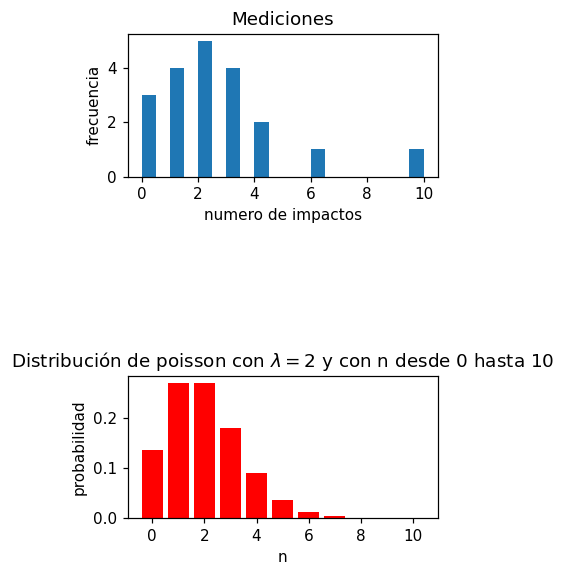

In [ ]:
fig = plt.figure(figsize=(8,12), dpi= 110)


ax1= fig.add_subplot(6,2,1) #gráfico 1
ax1.hist(mediciones, bins= 20)
ax1.set_title('Mediciones')
ax1.set_xlabel('numero de impactos')
ax1.set_ylabel('frecuencia')

ax2 = fig.add_subplot(6,2,5) #gráfico 2
ax2.bar(range(10+1), probs(2, 10),color= 'red')
ax2.set_title('Distribución de poisson con $\lambda = 2$ y con n desde 0 hasta 10')
ax2.set_xlabel('n')
ax2.set_ylabel('probabilidad')


fig.show()

finalmente luego de graficar, se puede observar en el gráfico azul la frecuencia por cantidad de impactos medidos con el sensor y en rojo podemos ver la probabilidad de obtener ''n'' impactos debido a la contaminación cuando en promedio ocurren 2 por esta causa.

haciendo un poquito de análisis podemos notar que obtener de 0 a 5 impactos debido a contaminación es relativamente poco probable aunque totalmente plausible




In [ ]:
lista_poisson= poisson(mediciones, 2)#lista con las distribuciones
                                     #de poisson calculadas

probabilidad_poisson= [i*100 for i in lista_poisson]#distribucion
                                                    #de poisson en
                                                    #porcentajes



med = mediciones          #variable 'med' y variable 'prob'
prob= probabilidad_poisson#es netamente para que sea más
                          #legible el codigo del diccionario

dicc_poisson= {f'prob. de medir {med} impactos':f'{prob}%' for (med,prob) in zip(med,prob)}
pprint(dicc_poisson)

{'prob. de medir 0 impactos': '13.53352832366127%',
 'prob. de medir 1 impactos': '27.06705664732254%',
 'prob. de medir 10 impactos': '0.0038189850648779593%',
 'prob. de medir 2 impactos': '27.06705664732254%',
 'prob. de medir 3 impactos': '18.04470443154836%',
 'prob. de medir 4 impactos': '9.02235221577418%',
 'prob. de medir 6 impactos': '1.2029802954365574%'}


cuando mostramos la información en porcentajes podemos comprobar que efectivamente medir entre 1 a 4 impactos debido a contaminación es totalmente probable que pase (recordar que las mediciones se hacen a cada segundo entonces un 9% de probabilidades es bastante alta), ya cuando se midieron 6 impactos podemos hablar de hay indicios de que estas mediciones no fueron solo debido a contaminación ya que hay un 1% de probabilidades de que esto ocurra.

por último podemos ver una medición de 10 impactos; En el gráfico no podemos visualizar su probabilidad de ocurrencia y cuando calculamos su distribución de poisson notamos que la probabilidad de que ocurran 10 mediciones debido a contaminación es del 0,0038% , con esto podemos decir con casi total seguridad que estas detecciones no fueron un error.